Brandon Guijarro
Josh Johnson
Machine Learning

This link contains information about housing prices in the Boston area in 1978
https://drive.google.com/file/d/1EtNMLkPCltdm8TH_HA-c8D4L75apgzkn/view?usp=sharing

  It is a modified version of a classic data set used to introduce machine learning.  This is the data dictionary for this data set:

          CRIM     per capita crime rate by town

          NOX      nitric oxides concentration (parts per 10 million)

          RM       average number of rooms per dwelling

          AGE      proportion of owner-occupied units built prior to 1940

          PTRATIO  pupil-teacher ratio by town

          LSTAT    % lower economic status of the population

          PRICE   Median value of owner-occupied homes in $1000's

The ultimate goal of this task is to predict the PRICE based on the available features using a linear regression model.

All of the features and the target are continuous variables. 

For now, you do not need to do any cleaning to this data set. You can use it "as is."

An important exploration step is to determine if there are any moderate or strong correlations in your variables.

1) Make a heatmap of the correlations.  Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price.   We will limit our analysis to these three features.

2) Select columns for your feature matrix (X) and select PRICE for your target vector (y).

3) Split your data into train and test groups. Please use random number 42 for consistency!

4) Instantiate your model and fit it on the training set.

5) Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?

6) Evaluate your model using mean absolute error (MAE).

7) Evaluate your model using mean squared error (MSE).  

8) Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.  

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Boston_Housing_from_Sklearn.csv')
df

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,21.0,9.67,22.4
502,0.04527,0.573,6.120,76.7,21.0,9.08,20.6
503,0.06076,0.573,6.976,91.0,21.0,5.64,23.9
504,0.10959,0.573,6.794,89.3,21.0,6.48,22.0


In [3]:
corr = df.corr()
corr

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


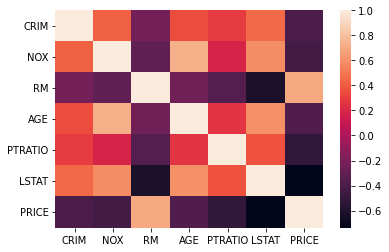

In [4]:
#1
sns.heatmap(corr)

In [5]:
#2
y = df['PRICE']
x = df[['LSTAT', 'RM','PTRATIO']]

In [6]:
#3
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.8)

In [7]:
#4
model = LinearRegression()
model.fit(x_train, y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


In [8]:
#5
r2_score(y_train, train_pred)

0.6864566575056517

In [9]:
r2_score(y_test, test_pred)

0.6302528487272826

In [10]:
#6
mean_absolute_error(y_train, train_pred)

3.682797455829691

In [11]:
mean_absolute_error(y_test, test_pred)


3.3325380783240965

In [12]:
#7
mean_squared_error(y_train, train_pred)

27.238577411646844

In [13]:
mean_squared_error(y_test, test_pred)

27.11495741558059

In [14]:
mean_squared_error(y_train, train_pred, squared=False)

5.219059054240223

In [15]:
mean_squared_error(y_test, test_pred, squared=False)

5.207202455789537